<a href="https://colab.research.google.com/github/aminsamir45/MIT-9.40-Neural-Computation/blob/main/PSET%202/PSET2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PSET 2         $\hspace{3in}$                                      Due 03/3/2023 - 11:59PM**

# NAME: Samir Amin
# GMAIL: aminsam@mit.edu



---

link to your colab: https://colab.research.google.com/drive/1y6EIIVqD3wbaAkF5s2q21D9eOcS-7EZS

---




# Learning objectives and outcomes:

This problem set investigates two models of how neurons spike in response to current inputs. The **leaky integrate and fire** (LIF) model is based on the simple RC model of a cell, with an extra rule: the model neuron spikes whenever the membrane potential passes above a threshold. Despite its simplicity, the ideas behind this model constitute the cornerstone of many fundamental computational modelling approaches. In contrast to this simplified model, real neurons produce spikes due to the presence of voltage-dependent ion channels. The Hodgkin-Huxley model is the first model to capture these rich dynamics. It does so by incorporating biophysically accurate descriptions of the sodium and potassium channels. More elaborate biophysically inspired models take the work of Hodgkin-Huxley as a starting point. 
These models were covered in lectures 3-5. 

The expected learning outcomes for this PSET are:

* Estimate model parameters from different plots of model behavior.
*	Interpret the biophysical role of these parameters.
*	Write code to simulate a model to check your parameter estimations.
*	Produce f-I curves (firing rate versus current injected).  
*	Be able to present your results as a cohesive and well-structured report.


##Python functions you will need:

There is quite a lot of overlap with PSET 1 in terms of functions needed to successfully complete this PSET.

There are many help functions in this PSET. Some of these functions are not fully functional and you will have to supply any missing code in them.

.


In addition, the following data files are needed:



*   fi_data.npz
*   lowInput.npz
*  spikingData.npz
*  zeroInput.npz


.

 
As a reminder the main plotting toolbox is matplotlib. Remember that, when using subplots, the function $pyplot.tight\_layout()$ can help keep things tidy!



---




Next, mount your google drive. This is where you will be saving your files which you can access from anywhere.
Colab will add a new folder "Colab Notebook" to your google drive. This can be accessed from "drive/MyDrive/" on the left as you click on the folder picture. You can also create our own folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# If you choose to build helper functions instead of the structure we provided you here, you'll have to update the files in the cloud if you make any changes to helper functions you build:
#drive.mount("/content/drive", force_remount=True)  # instead of remounting, you can use 'Runtime/Resart and run all'
# 
# 

Mounted at /content/drive


# **Problem 1: Estimating the LIF parameters**


The provided data files (*.npz) contain the outputs of a simulated leaky integrate-and-fire neuron. You will use these data to determine the properties of the model used to generate the data.

You have three files that contain the outputs of this model $(zeroInput.npz, spikingData.npz and lowInput.npz)$. 

These files contain outputs of the model neuron’s voltage (as $‘V’$) and spike times (timestamps at which spikes were generated, as $‘spkTimes’$), along with the current used to stimulate the neuron (as $‘I’$) and a time vector (as $‘t’$). Keep in mind that the size of $‘spkTimes’$ will vary depending on the current used to stimulate the cell. In particular, if there are no spikes in response to the current, spkTimes will be empty.

.


You also have a file called $fi\_data.npz$, which contains the spike rate (as $‘rate’$) for the neuron in response to different current stimulations ($‘amps’$).


.


We know that the behavior of an LIF neuron is determined by 5 parameters: the resting membrane potential $(EL)$, the spiking threshold $(Vthresh)$, the reset membrane potential $(Vreset)$, the total membrane resistance $(Rm)$, and the total membrane capacitance $(Cm)$.

.


Your job is to use plots and/or calculations to estimate each of these parameters from the data. Keep in mind that you will have to use all of the data files provided to recover all 5 parameters.





Using relevant plots and or calculations complete these tasks. Make sure to justify all your answers properly and provide proper units for your estimates. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1.1:

Load and plot voltage and current traces for each of the three simulation data files below.

First, let's import and plot each data file. Note that each of these has the 
 same variable names in the dictionary, so they should be loaded and assigned 
 independently.

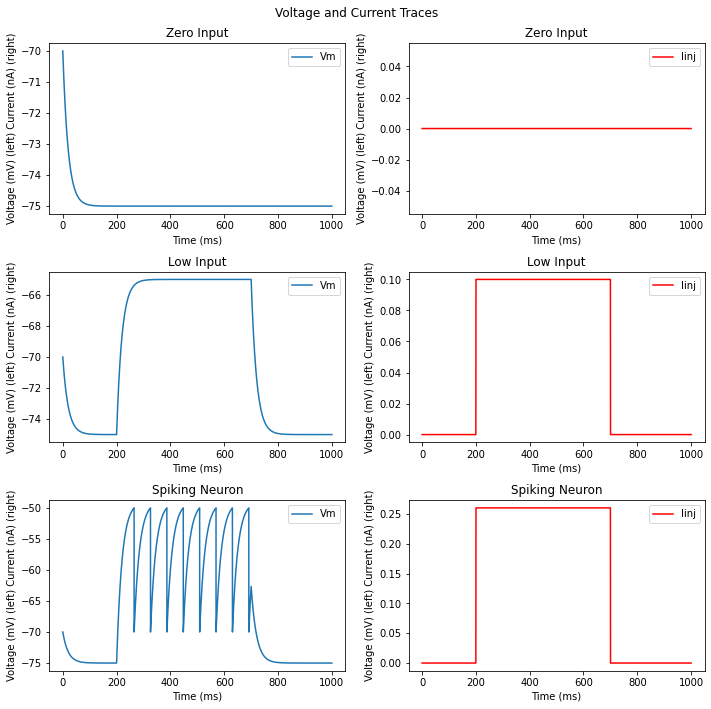

In [ ]:
# load the data files from your google drive. (Remember my_colab is my local folder in my grdive where I saved my files. Yours may be different!)

zero_input_data = np.load('/content/drive/My Drive/Colab Notebooks/9.40/psets/PSET 2/zeroInput.npz')
low_input_data = np.load('/content/drive/My Drive/Colab Notebooks/9.40/psets/PSET 2/lowInput.npz')
spiking_neuron_data = np.load('/content/drive/My Drive/Colab Notebooks/9.40/psets/PSET 2/spikingData.npz')

t_zero, V_zero, I_zero = zero_input_data['t'], zero_input_data['V'], zero_input_data['I']
t_low, V_low, I_low = low_input_data['t'], low_input_data['V'], low_input_data['I']
t_spiking, V_spiking, I_spiking = spiking_neuron_data['t'], spiking_neuron_data['V'], spiking_neuron_data['I']

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Voltage and Current Traces')

# zero input
axs[0, 0].plot(t_zero, V_zero, label='Vm')
axs[0, 0].set_title('Zero Input')
axs[0, 1].plot(t_zero, I_zero, label='Iinj', color='r')
axs[0, 1].set_title('Zero Input')

# low input 
axs[1, 0].plot(t_low, V_low, label='Vm')
axs[1, 0].set_title('Low Input')
axs[1, 1].plot(t_low, I_low, label='Iinj', color='r')
axs[1, 1].set_title('Low Input')

# spiking neuron 
axs[2, 0].plot(t_spiking, V_spiking, label='Vm')
axs[2, 0].set_title('Spiking Neuron')
axs[2, 1].plot(t_spiking, I_spiking, label='Iinj', color='r')
axs[2, 1].set_title('Spiking Neuron')

# legends and labels
for ax in axs.flat:
    ax.set(xlabel='Time (ms)', ylabel='Voltage (mV) (left) Current (nA) (right)')
    ax.legend()

plt.tight_layout()
plt.show()







##Question 1.2

Estimate the membrane potential, $E_L$, for this neuron.


Use a combination of analytic/graphical method.

Answer:

According to all three Voltage graphs in question 1, we see that the membrane potential is when the neuron is not spiking. The curve begins to flatten out. The value of this membrane potential is -75 mV


## Question 1.3:

* Estimate $V_{thresh}$.






Vthresh is approximately -50mv according to the first-spike latency method, where the constant spike of the first action potential indicates the threshold. 

## Question 1.4:
* Estimate $V_{reset}$.




Vreset is approximately -70mv according to the graph. This is because after each of the spikes in the spiking neuron graph, the Voltage decreases to -70mv before spiking again. Therefore, this is the value of the voltage reseting.



## Question 1.5

* Estimate $R_m$






Rm is estimated based on Ohm's law: Rm = deltaV / deltaI. We can see from the graphs above that the integral of the Voltage graph on the left is 100 times more than the integral of the current graphs on the right. Therefore, Rm must be 100 megaohms

## Question 1.6:

* From the graph of a step current, estimate the time constant for this neuron



The time constant is approximately 10ms

## Question 1.7:
* Estimate $C_m$ for this neuron

Cm for this would be 0.1 nF because the equation for the time constant is tau = R*C which becomes C = tau / R.

## Question 1.8:

Estimate the rheobase of this neuron, i.e., the current amplitude such that the steady-state is equal to $V_{thresh}$.

What is the significance of the rheobase with respect to the neuron's spiking behavior?



Answer:The rheobase is approximately 0.25 nA. We can see this from the graph of the spiking neuron data with current (right). The significance of the rheobase is that for any value greater than it, the neuron will spike. For any value less than it, the neuron will not spike. 



Hint: An analytic argument should be enough to determine I_rheobase.



.




## Question 1.9:

Plot the firing rate $f$ in Hertz (Hz) as a function of the injected current amplitude. This is called an f-I curve. Describe the different regions of this curve.

**Use fi_data.npz.**


Note: We are defining the rate the same way as we did in class: as the reciprocal of the time elapsed between two consecutive spikes.





Answer:





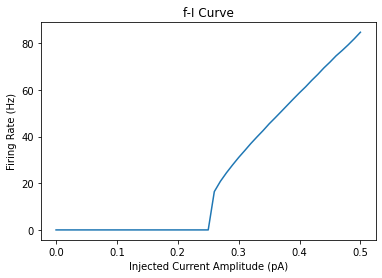

In [ ]:
fi_data = np.load('/content/drive/My Drive/Colab Notebooks/9.40/psets/PSET 2/fi_data.npz')
amps = fi_data['amps']
rate = fi_data['rate']

plt.plot(amps, rate), plt.xlabel('Injected Current Amplitude (pA)'), plt.ylabel('Firing Rate (Hz)'), plt.title('f-I Curve')
plt.show()


## Question 1.10:

From the previous plot, estimate $C_m$.




Answer: Cm is approximately 0.2 nF.


.





---

---





# Problem 2: Numerical simulation of an LIF neuron

In the previous problem you estimated the 5 parameters that control the behavior of an LIF neuron. In this problem, your job is to write code to implement an LIF neuron model with **those parameters**. This will give you an opportunity to verify your parameter estimates. 

You may find code from problem 2 in PSET 1 hepful. Don’t forget to include a variable to keep track of the spike times. It might be a good idea to wrap this code in a function
with the following calling syntax:

.

\>\> $(V,I,t,spike\_times) = LIFneuron(amp)$




.





Start by writing the function LIFneuron():






In [ ]:
def LIFneuron(amp):
    # LIFneuron: Simulates an LIFneuron for 1 second.
    #
    # Input argument:
    # amp: current amplitude in nanoamperes (nA)
    #
    # Outputs:
    # V: membrane potental in mV
    # I: Current pulse in nA
    # t: time in msec
    # spikeCounts: number of spikes fired.

    V_threshold = -50                         # mV
    V_reset = -70                            # mV
    E_L = -75                               # mv
    R = 100                                 # MOhm
    C = 0.1                                 # nF
    
    tau = R*C # msec
    dt = 0.1 # msec
    t = np.arange(0,1000.1,dt) # msec
    num_iter = t.size
    V = np.empty(num_iter) # mV
    V[0] = V_reset # mV
    I = np.zeros(num_iter)
    I[np.logical_and(t>=200, t<=700)] = amp # nA
    spike_times = np.empty(0)
    
    
    for idx in range(1, num_iter):
        dV = dt/tau * (E_L - V[idx-1] + R*I[idx-1])
        V[idx] = V[idx-1] + dV
        
        if V[idx] >= V_threshold:
            V[idx] = V_reset
            spike_times = np.append(spike_times, t[idx])
    
    return (V, I, t, spike_times)
  

## Question 2.1:

Plot the $f-I$ curve of this neuron, where f is the firing rate.


.

.


Hint: In addition to the function LIFneuron(), the functions  **np.diff()**  and **np.divide()** may be helpful for this question.

For examples, check it out here: https://www.geeksforgeeks.org/numpy-diff-in-python/



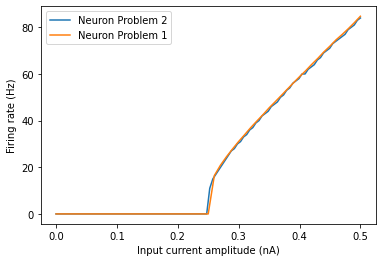

In [ ]:
amps_0 = fi_data['amps']
rate_0 = fi_data['rate']
# range of input current amplitudes to test
amps = np.linspace(0, .5, 100)

# firing rate for each input current amplitude
firing_rates = []
for amp in amps:
    # simulate neuron
    V, I, t, spike_times = LIFneuron(amp)
    # calculate firing rate
    num_spikes = len(spike_times)
    duration = t[-1] - t[0]
    firing_rate = num_spikes / duration * 1000  # convert to Hz
    firing_rates.append(firing_rate)

# plot f-I curve
plt.plot(amps, firing_rates, label = 'Neuron Problem 2')
plt.plot(amps_0, rate_0, label = 'Neuron Problem 1')
plt.legend()
plt.xlabel('Input current amplitude (nA)')
plt.ylabel('Firing rate (Hz)')
plt.show()






## Question 2.2

On the previous plot overlay the f-I curve obtained in problem 1 question 8. Comment on any similarities or discrepancies between the two curves.





Answer:

The two graphs are identical. They display the same information about the firing rate as a function of the current amplitude.




---

---





# **Problem 3: The role of sodium channel inactivation on the refractory period            in the Hodgkin-Huxley model**


The gating variables, $m, h$ and $n_I$, obey this  first order linear differential equation:

\begin{equation}
\tau_x (V) \frac{dx}{dt} = x_\infty (V) - x,\tag{3.1}
\end{equation}
where $x$ is an index to reflect any of those gating variables. It is important to notice that the time constant and steady state value depend on the membrane potential:
\begin{eqnarray}
\tau_x (V) & = & \frac{1}{\alpha_x (V) + \beta_x (V)} \tag{3.2}\\
x_\infty & = & \frac{\alpha_x (V)}{\alpha_x (V) + \beta_x (V)} \tag{3.3}
\end{eqnarray}

The voltage dependency is through the rate constants $\alpha_x$ and $\beta_x$  which have the following mathematical expressions:

\begin{eqnarray}
\alpha_h &=& 0.07 \exp(-0.05(V+70)) & , \hspace{0.2in} & \beta_h &=& \frac{1}{1 + \exp(-0.1(V+40))}\\
\alpha_m & = & \frac{0.1(V+45)}{1-\exp(-0.1(V+45))} &, \hspace{0.2in} & \beta_m & =& 4 \exp ( -0.0556(V+70)) \\
\alpha_n & = & \frac{0.01(V+60)}{1-\exp(-0.1(V+60))} &, \hspace{0.2in} & \beta_n & = & 0.125 \exp((-0.0125(V+70))
\tag{3.4}
\end{eqnarray}

In these formulae the membrane potential is in mV and the rate constants in ms${}^{-1}$.

These 6 functions are implemented below.


The script **HH.py** in the same folder implements a simulation of a Hodgkin-Huxley neuron under a current clamp experiment. Current clamp means that we control the external current applied and measure the membrane potential in response to our manipulation. Note that this is different from voltage clamp in which we control the membrane potential and measure the ionic current. 
In particular, this script is set to apply a depolarizing external current of $10 \mu A/cm^2$ for 10 milliseconds. If you run this file you will see three plots: the membrane potential as a function of time, the external current applied as a function of time, and the gating variables as a function of time.


Your job is to use these functions and make modifications as instructed to study the role of sodium channel inactivation and its effect on the refractory period.


## Question 3.1

1.	Make a figure with 2 panels. On one panel plot the steady state of the inactivation gating variables $h_\infty$ as a function of membrane potential. On the other panel plot the time constant of inactivation $\tau_h$ as a function of membrane potential. Restrict your plot to the range $-100$ to $100 \; mV$. 


$$ h_\infty = \frac{\alpha_h(V)}{\alpha_h(V) + \beta_h(V)} $$





---







---

---





First, we provide you with the parameters in the HH model in the functions below. These functions are incomplete. You will have to add anything that is missing



In [ ]:
def alpha_h(V, gain=1):
    # input: membrane potential in mV
    # output: rate constant in ms^-1
    return gain * 0.07 * np.exp(-0.05*(V+70))

def alpha_m(V):
    # input: membrane potential in mV
    # output: rate constant in ms^-1  
    return (0.1*(V+45))/(1-np.exp(-0.1*(V+45)))
    
def alpha_n(V):
    # input: membrane potential in mV
    # output: rate constant in ms^-1
    return (0.01*(V+60))/(1-np.exp(-0.1*(V+60)))

def beta_h(V):
    # input: membrane potential in mV
    # output: rate constant in ms^-1
    return 1/(1+np.exp(-0.1*(V+40)))
    
def beta_m(V):
    # input: membrane potential in mV
    # output: rate constant in ms^-1   
    return 4* np.exp(-0.0556*(V+70))

def beta_n(V):
    # input: membrane potential in mV
    # output: rate constant in ms^-1   
    return 0.125* np.exp(-0.0125*(V+70))

def h_inf(V, gain = 1):
    # input: membrane potential in mV
    # output: steady state of h
    alpha = alpha_h(V, gain)
    beta = beta_h(V)
    h_inf = alpha / (alpha + beta)
    return h_inf

def tau_h_original(V, gain = 1):
    # input: membrane potential in mV
    # output: time constant of h in ms^-1
    alpha = alpha_h(V, gain)
    beta = beta_h(V)
    tau_h = 1 / (alpha + beta)

    return tau_h

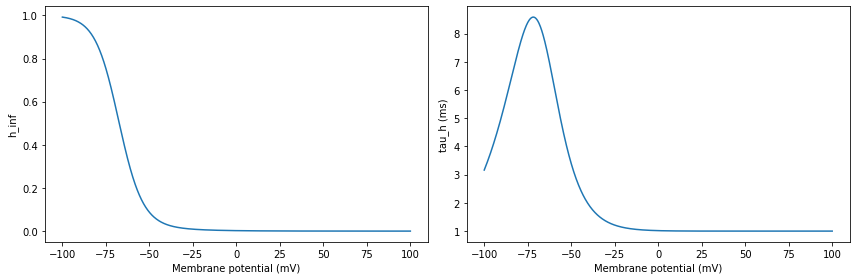

In [ ]:

# your two plots should go here
V = np.linspace(-100, 100, 1000)


# panel 1: h_inf vs V
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(V, h_inf(V))
ax1.set_xlabel('Membrane potential (mV)')
ax1.set_ylabel('h_inf')

# panel 2: tau_h vs V
ax2.plot(V, tau_h_original(V))
ax2.set_xlabel('Membrane potential (mV)')
ax2.set_ylabel('tau_h (ms)')

plt.tight_layout()
plt.show()




## Question 3.2

Next make a copy of **HH.py** and call it **hh_paired**. Modify this function so that it applies two current pulses, each of amplitude $3 \mu A/cm2$ and a duration of $10\; milliseconds$. The pulses should have an inter-pulse interval of $10\; milliseconds$.  That is they are separated by 10 milliseconds measured from end of first pulse to the start of second pulse. Look at the plots and comment on what you see.

</br>

**Note**: if you face issues with the parameters (e.g., $\alpha_n$) because their denominators vanish, you may try to use l'hospital rule to avoid any infinities.

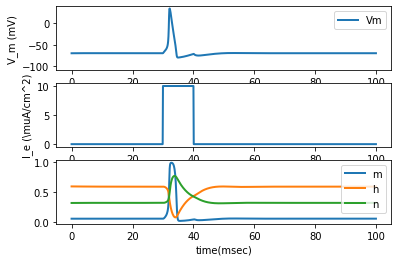

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
# import hh_functions as 
# Hodgkin Huxley model 
# Numerically integrated with an Exponential Euler Scheme 

#Units:
#voltage is in millivolts (mV)
#current is in microamperes (uA)
#capacitance is in microfarads (uF)
#conductance is in millisiemens (mS)
#area is in centimeters squared (cm^2)
#time is in milliseconds (ms)

# Area of cell
A = 1 #cm^2
#membrane capacitance per unit area:
C = 1.0      # (uF/cm^2)
#max possible Na+ conductance per unit area:
gNabar = 120 # (mS/cm^2)
#max possible K+ conductance per unit area:
gKbar = 36   # (mS/cm^2)
#leakage conductance per unit area:
gLbar = 0.3  # (mS/cm^2)
#Na+ equilibrium potential:
ENa = 45   #   (mV)
#K+ equilibrium potential:
EK = -82   #   (mV)
#leakage channel reversal potential:
EL = -59   #   (mV)

#initialize time step and experiment duration:
dt = 0.1     # time step duration (ms)
t_max = 100    #duration of experiment (ms)

#total number of time steps in the experiment:
n_iter = math.ceil(t_max/dt)

#initialize arrays that hold data for plotting:
m_plot = np.zeros(n_iter)
h_plot = np.zeros(n_iter)
n_plot = np.zeros(n_iter)
H_plot = np.zeros(n_iter)
V_plot = np.zeros(n_iter)
t_plot = np.arange(0,n_iter)*dt # time vector in ms

#voltage just at t=0: initial condition
V_start = -70
V_plot[0] = V_start
# In fact we are assuming V was at -70 before experiment to set m,h,n to 
# their steady state values at -70

# minf, hinf, ninf at -70  for initial condition
m_plot[0] = alpha_m(V_plot[0])/(alpha_m(V_plot[0])+beta_m(V_plot[0]))
h_plot[0] = alpha_h(V_plot[0])/(alpha_h(V_plot[0])+beta_h(V_plot[0]))
n_plot[0] = alpha_n(V_plot[0])/(alpha_n(V_plot[0])+beta_n(V_plot[0]))
H_plot[0] = alpha_h(V_plot[0], gain =2)/(alpha_h(V_plot[0], gain =2)+beta_h(V_plot[0]))

# Current injected
I_e = np.zeros(n_iter)
# square pulse of current starts at 30 ms and ends at 40 ms
I_e[np.logical_and(t_plot>= 30, t_plot<= 40)] = 10 # (uA/cm^2)

# Main for loop to numerically integrate the HH model 
for k in range(n_iter-1):
  # taus for m,h,n
    tau_m = 1 /(alpha_m(V_plot[k])+beta_m(V_plot[k]))
    tau_h = 1 /(alpha_h(V_plot[k])+beta_h(V_plot[k]))
    tau_n = 1 /(alpha_n(V_plot[k])+beta_n(V_plot[k]))
    tau_H = 1 /(alpha_h(V_plot[k], gain = 2)+beta_h(V_plot[k]))
  
  # Steady state values for m, h, n
    m_inf = alpha_m(V_plot[k])/(alpha_m(V_plot[k])+beta_m(V_plot[k]))
    h_inf = alpha_h(V_plot[k])/(alpha_h(V_plot[k])+beta_h(V_plot[k]))
    n_inf = alpha_n(V_plot[k])/(alpha_n(V_plot[k])+beta_n(V_plot[k]))  
    H_inf = alpha_h(V_plot[k], gain =2)/(alpha_h(V_plot[k], gain =2)+beta_h(V_plot[k]))
  
  # Update m, h, and n using the Exponential-Euler method
    m_plot[k+1] = m_inf+(m_plot[k]-m_inf)*np.exp(-dt/tau_m)
    h_plot[k+1] = h_inf+(h_plot[k]-h_inf)*np.exp(-dt/tau_h)
    n_plot[k+1] = n_inf+(n_plot[k]-n_inf)*np.exp(-dt/tau_n)
    H_plot[k+1] = H_inf+(H_plot[k]-H_inf)*np.exp(-dt/tau_H)
  
  # Update conductances
    gNa = gNabar*(m_plot[k+1]**3)*h_plot[k+1]    #sodium conductance
    gK = gKbar*(n_plot[k+1]**4)                  #potassium conductance
    g = gNa+gK+gLbar                            #total conductance
    gE = gNa*ENa+gK*EK+gLbar*EL                 #gE=g*E
    
  # update vinf
    V_inf = (gE + I_e[k]/A) / g
  # update tauv
    tau_V = C/g
  # exponential euler for updating membrane potential
    V_plot[k+1] = V_inf + (V_plot[k]-V_inf)*np.exp(-dt/tau_V);


figHH, axHH = plt.subplots(3,1)


axHH[0].plot(t_plot, V_plot, linewidth=2, label='Vm'); 
axHH[0].set(ylim=(-110, 40), ylabel='V_m (mV)')
axHH[0].legend()

axHH[1].plot(t_plot,I_e,linewidth=2)
axHH[1].set(ylabel='I_e (\muA/cm^2)')

axHH[2].plot(t_plot, m_plot, linewidth=2, label='m')
axHH[2].plot(t_plot, h_plot, linewidth=2, label='h')
axHH[2].plot(t_plot, n_plot, linewidth=2, label='n')
axHH[2].set(xlabel='time(msec)')
axHH[2].legend()

plt.show()
# figHH.savefig("hhPlot.png")mlm

**Note the hh_paired function takes 3 arguments: amp = current amplitude, interpulse interval and gain.


## Question 3.3

Modify the code so that the inter-pulse interval is now 2 milliseconds but keeping the amplitude at $3 \mu A/cm^2$. Look at the output plots, what has changed from the previous case?  What is the role of the inactivation gating variable in this behavior?   



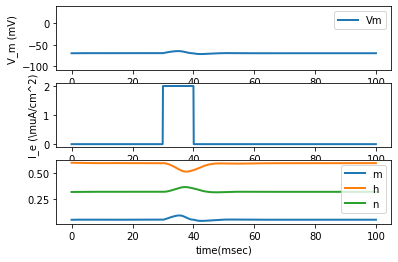

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
# import hh_functions as 
# Hodgkin Huxley model 
# Numerically integrated with an Exponential Euler Scheme 

#Units:
#voltage is in millivolts (mV)
#current is in microamperes (uA)
#capacitance is in microfarads (uF)
#conductance is in millisiemens (mS)
#area is in centimeters squared (cm^2)
#time is in milliseconds (ms)

# Area of cell
A = 1 #cm^2
#membrane capacitance per unit area:
C = 1.0      # (uF/cm^2)
#max possible Na+ conductance per unit area:
gNabar = 120 # (mS/cm^2)
#max possible K+ conductance per unit area:
gKbar = 36   # (mS/cm^2)
#leakage conductance per unit area:
gLbar = 0.3  # (mS/cm^2)
#Na+ equilibrium potential:
ENa = 45   #   (mV)
#K+ equilibrium potential:
EK = -82   #   (mV)
#leakage channel reversal potential:
EL = -59   #   (mV)

#initialize time step and experiment duration:
dt = 0.1     # time step duration (ms)
t_max = 100    #duration of experiment (ms)

#total number of time steps in the experiment:
n_iter = math.ceil(t_max/dt)

#initialize arrays that hold data for plotting:
m_plot = np.zeros(n_iter)
h_plot = np.zeros(n_iter)
n_plot = np.zeros(n_iter)
V_plot = np.zeros(n_iter)
t_plot = np.arange(0,n_iter)*dt # time vector in ms

#voltage just at t=0: initial condition
V_start = -70
V_plot[0] = V_start
# In fact we are assuming V was at -70 before experiment to set m,h,n to 
# their steady state values at -70

# minf, hinf, ninf at -70  for initial condition
m_plot[0] = alpha_m(V_plot[0])/(alpha_m(V_plot[0])+beta_m(V_plot[0]))
h_plot[0] = alpha_h(V_plot[0])/(alpha_h(V_plot[0])+beta_h(V_plot[0]))
n_plot[0] = alpha_n(V_plot[0])/(alpha_n(V_plot[0])+beta_n(V_plot[0]))

# Current injected
I_e = np.zeros(n_iter)
# square pulse of current starts at 30 ms and ends at 40 ms
I_e[np.logical_and(t_plot>= 30, t_plot<= 40)] = 2 # (uA/cm^2)

# Main for loop to numerically integrate the HH model 
for k in range(n_iter-1):
  # taus for m,h,n
    tau_m = 1 /(alpha_m(V_plot[k])+beta_m(V_plot[k]))
    tau_h = 1 /(alpha_h(V_plot[k])+beta_h(V_plot[k]))
    tau_n = 1 /(alpha_n(V_plot[k])+beta_n(V_plot[k]))
  
  # Steady state values for m, h, n
    m_inf = alpha_m(V_plot[k])/(alpha_m(V_plot[k])+beta_m(V_plot[k]))
    h_inf = alpha_h(V_plot[k])/(alpha_h(V_plot[k])+beta_h(V_plot[k]))
    n_inf = alpha_n(V_plot[k])/(alpha_n(V_plot[k])+beta_n(V_plot[k]))  
  
  # Update m, h, and n using the Exponential-Euler method
    m_plot[k+1] = m_inf+(m_plot[k]-m_inf)*np.exp(-dt/tau_m)
    h_plot[k+1] = h_inf+(h_plot[k]-h_inf)*np.exp(-dt/tau_h)
    n_plot[k+1] = n_inf+(n_plot[k]-n_inf)*np.exp(-dt/tau_n)
  
  # Update conductances
    gNa = gNabar*(m_plot[k+1]**3)*h_plot[k+1]    #sodium conductance
    gK = gKbar*(n_plot[k+1]**4)                  #potassium conductance
    g = gNa+gK+gLbar                            #total conductance
    gE = gNa*ENa+gK*EK+gLbar*EL                 #gE=g*E
    
  # update vinf
    V_inf = (gE + I_e[k]/A) / g
  # update tauv
    tau_V = C/g
  # exponential euler for updating membrane potential
    V_plot[k+1] = V_inf + (V_plot[k]-V_inf)*np.exp(-dt/tau_V);


figHH, axHH = plt.subplots(3,1)


axHH[0].plot(t_plot, V_plot, linewidth=2, label='Vm'); 
axHH[0].set(ylim=(-110, 40), ylabel='V_m (mV)')
axHH[0].legend()

axHH[1].plot(t_plot,I_e,linewidth=2)
axHH[1].set(ylabel='I_e (\muA/cm^2)')

axHH[2].plot(t_plot, m_plot, linewidth=2, label='m')
axHH[2].plot(t_plot, h_plot, linewidth=2, label='h')
axHH[2].plot(t_plot, n_plot, linewidth=2, label='n')
axHH[2].set(xlabel='time(msec)')
axHH[2].legend()

plt.show()
figHH.savefig("hhPlot.png")

Answer: From the previous plot, it is clear that the voltage in the first plot did not see the spiking that it did in the first plot for a 10ms interval. In addition, the third plot showing the gating variables do not spike nearly as hard as they did in the third plot of the interval of 10ms. The role of the inactivation gating variable here is that during the second injected current, h seems to have a slight depression to it indicating a reduction in the opening of the sodium channels and therefore reduced depolarization. This results in the neuron not having an action potential.


.



## Question 3.4

Double the value of the rate, $alpha\_h$ for all values of membrane potential. In a single plot overlay the $h_\infty$ versus membrane potential curves for the original and modified version. What is the effect of this change in $\alpha_h$ on $h_\infty$?

Note: You need to change the gain in the function $alpha\_h$ to double the rate.



Answer: Increasing the alpha_h value by a factor of 2 increases the value of h_inf. This essentially means that you are increasing the rate at which h is opened while while not changing the rate at which h is closed. This will shift the equilibrium value towards the greater h.
.



Text(0, 0.5, 'h_inf')

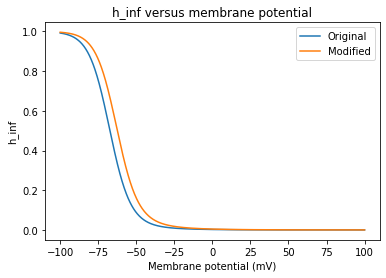

In [ ]:
v = np.linspace(-100, 100, 1000)
V = np.linspace(-100, 100, 1000)

fig, ax1 = plt.subplots()
plt.title("h_inf versus membrane potential")
ax1.plot(v, h_inf(V), label = 'Original')
ax1.plot(v, h_inf(V, gain = 2), label = 'Modified')
plt.title("h_inf versus membrane potential")
ax1.set_xlabel('Membrane potential (mV)')
plt.legend()
ax1.set_ylabel('h_inf')

## Question 3.5

In a single plot overlay the $\tau_h$ versus membrane potential curves for the original and modified version. What is the effect of this change in $\alpha_h$ on $\tau_h$?


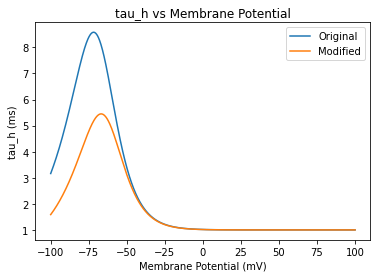

In [ ]:
v = np.linspace(-100, 100, 1000)

tau_h = tau_h_original(v)
tau_h_mod = tau_h_modified(v)


fig, ax = plt.subplots()
ax.plot(v, tau_h, label='Original')
ax.plot(v, tau_h_mod, label='Modified')
ax.set_xlabel('Membrane Potential (mV)')
ax.set_ylabel('tau_h (ms)')
plt.title("tau_h vs Membrane Potential")
ax.legend()


plt.show()



Answer: Increasing alpha_h by a factor of 2 results in a decreased time constant tau_h. This is because alpha_h is a rate constant which means that increasing its value will increase how quickly h reaches equlibrium. The faster that h can come to equlibrium, the lower the time constant will be.


.






## Question 3.6

Redo question 3 but using the  doubled alpha_h. Comment on the changes you see. Relate this to the sodium channel disorders discussed in lecture. 

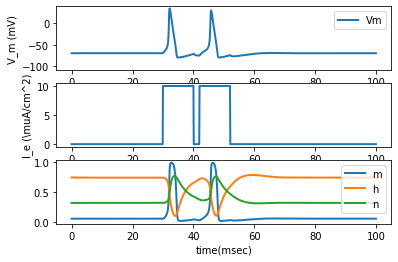

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
# import hh_functions as 
# Hodgkin Huxley model 
# Numerically integrated with an Exponential Euler Scheme 

#Units:
#voltage is in millivolts (mV)
#current is in microamperes (uA)
#capacitance is in microfarads (uF)
#conductance is in millisiemens (mS)
#area is in centimeters squared (cm^2)
#time is in milliseconds (ms)

# Area of cell
A = 1 #cm^2
#membrane capacitance per unit area:
C = 1.0      # (uF/cm^2)
#max possible Na+ conductance per unit area:
gNabar = 120 # (mS/cm^2)
#max possible K+ conductance per unit area:
gKbar = 36   # (mS/cm^2)
#leakage conductance per unit area:
gLbar = 0.3  # (mS/cm^2)
#Na+ equilibrium potential:
ENa = 45   #   (mV)
#K+ equilibrium potential:
EK = -82   #   (mV)
#leakage channel reversal potential:
EL = -59   #   (mV)

#initialize time step and experiment duration:
dt = 0.1     # time step duration (ms)
t_max = 100    #duration of experiment (ms)

#total number of time steps in the experiment:
n_iter = math.ceil(t_max/dt)

#initialize arrays that hold data for plotting:
m_plot = np.zeros(n_iter)
h_plot = np.zeros(n_iter)
n_plot = np.zeros(n_iter)
H_plot = np.zeros(n_iter)
V_plot = np.zeros(n_iter)
t_plot = np.arange(0,n_iter)*dt # time vector in ms

#voltage just at t=0: initial condition
V_start = -70
V_plot[0] = V_start
# In fact we are assuming V was at -70 before experiment to set m,h,n to 
# their steady state values at -70

# minf, hinf, ninf at -70  for initial condition
m_plot[0] = alpha_m(V_plot[0])/(alpha_m(V_plot[0])+beta_m(V_plot[0]))
h_plot[0] = alpha_h(V_plot[0])/(alpha_h(V_plot[0])+beta_h(V_plot[0]))
n_plot[0] = alpha_n(V_plot[0])/(alpha_n(V_plot[0])+beta_n(V_plot[0]))
H_plot[0] = alpha_h(V_plot[0], gain =2)/(alpha_h(V_plot[0], gain =2)+beta_h(V_plot[0]))

# Current injected
I_e = np.zeros(n_iter)
# square pulse of current starts at 30 ms and ends at 40 ms
I_e[np.logical_and(t_plot>= 30, t_plot<= 40)] = 10 # (uA/cm^2)
I_e[np.logical_and(t_plot>= 42, t_plot<= 52)] = 10

# Main for loop to numerically integrate the HH model 
for k in range(n_iter-1):
  # taus for m,h,n
    tau_m = 1 /(alpha_m(V_plot[k])+beta_m(V_plot[k]))
    tau_h = 1 /(alpha_h(V_plot[k])+beta_h(V_plot[k]))
    tau_n = 1 /(alpha_n(V_plot[k])+beta_n(V_plot[k]))
    tau_H = 1 /(alpha_h(V_plot[k], gain = 2)+beta_h(V_plot[k]))
  
  # Steady state values for m, h, n
    m_inf = alpha_m(V_plot[k])/(alpha_m(V_plot[k])+beta_m(V_plot[k]))
    h_inf = alpha_h(V_plot[k])/(alpha_h(V_plot[k])+beta_h(V_plot[k]))
    n_inf = alpha_n(V_plot[k])/(alpha_n(V_plot[k])+beta_n(V_plot[k]))  
    H_inf = alpha_h(V_plot[k], gain =2)/(alpha_h(V_plot[k], gain =2)+beta_h(V_plot[k]))
  
  # Update m, h, and n using the Exponential-Euler method
    m_plot[k+1] = m_inf+(m_plot[k]-m_inf)*np.exp(-dt/tau_m)
    h_plot[k+1] = h_inf+(h_plot[k]-h_inf)*np.exp(-dt/tau_h)
    n_plot[k+1] = n_inf+(n_plot[k]-n_inf)*np.exp(-dt/tau_n)
    H_plot[k+1] = H_inf+(H_plot[k]-H_inf)*np.exp(-dt/tau_H)
  
  # Update conductances
    gNa = gNabar*(m_plot[k+1]**3)*h_plot[k+1]    #sodium conductance
    gK = gKbar*(n_plot[k+1]**4)                  #potassium conductance
    g = gNa+gK+gLbar                            #total conductance
    gE = gNa*ENa+gK*EK+gLbar*EL                 #gE=g*E
    
  # update vinf
    V_inf = (gE + I_e[k]/A) / g
  # update tauv
    tau_V = C/g
  # exponential euler for updating membrane potential
    V_plot[k+1] = V_inf + (V_plot[k]-V_inf)*np.exp(-dt/tau_V);


figHH, axHH = plt.subplots(3,1)


axHH[0].plot(t_plot, V_plot, linewidth=2, label='Vm'); 
axHH[0].set(ylim=(-110, 40), ylabel='V_m (mV)')
axHH[0].legend()

axHH[1].plot(t_plot,I_e,linewidth=2)
axHH[1].set(ylabel='I_e (\muA/cm^2)')

axHH[2].plot(t_plot, m_plot, linewidth=2, label='m')
axHH[2].plot(t_plot, H_plot, linewidth=2, label='h')
axHH[2].plot(t_plot, n_plot, linewidth=2, label='n')
axHH[2].set(xlabel='time(msec)')
axHH[2].legend()

plt.show()
# figHH.savefig("hhPlot.png")mlm

Answer: Overall, increasing the value of alpha_h results in a faster rate of opening the h-gates in the sodium channel. There is a faster increase in membrane potential and a shorter action potential as a result of the sodium channel activating faster. 

Sodium channel disorders including mutations lead to inactivation of the channels and symptoms including paralysis. This example is not an accurate representation of the disorders referred to in class since this channel has the ability to inactivate. 





---

---





# Problem 4: Hyperpolarization can excite neurons 

In this problem we want to study the effects of prolonged hyperpolarization on the behavior of the Hodgkin-Huxley model. In order to do so, add a function called **hh_hyper()**. This function should be a modified copy of HH.py. Modify this code such as to deliver a square pulse of current that starts a 10 ms and finishes at a 100 ms. Set the amplitude to -10 microamperes/cm2. Simulate for 150 ms total.


.

First, you will need to finish writing the function hh_hyper():





In [ ]:
def hh_hyper():
    #Units:
    #voltage is in millivolts (mV)
    #current is in microamperes (uA)
    #capacitance is in microfarads (uF)
    #conductance is in millisiemens (mS)
    #area is in centimeters squared (cm^2)
    #time is in milliseconds (ms)

    # Area of cell
    A = 1 #cm^2
    #membrane capacitance per unit area:
    C = 1.0      # (uF/cm^2)
    #max possible Na+ conductance per unit area:
    gNabar = 120 # (mS/cm^2)
    #max possible K+ conductance per unit area:
    gKbar = 36   # (mS/cm^2)
    #leakage conductance per unit area:
    gLbar = 0.3  # (mS/cm^2)
    #Na+ equilibrium potential:
    ENa = 45   #   (mV)
    #K+ equilibrium potential:
    EK = -82   #   (mV)
    #leakage channel reversal potential:
    EL = -59   #   (mV)

    #initialize time step and experiment duration:
    dt = 0.1     # time step duration (ms)
    t_max = 150    #duration of experiment (ms)

    #total number of time steps in the experiment:
    n_iter = math.ceil(t_max/dt)

    #initialize arrays that hold data for plotting:
    m_plot = np.zeros(n_iter)
    h_plot = np.zeros(n_iter)
    n_plot = np.zeros(n_iter)
    H_plot = np.zeros(n_iter)
    V_plot = np.zeros(n_iter)
    t_plot = np.arange(0,n_iter)*dt # time vector in ms



    # minf, hinf, ninf at -70  for initial condition
    m_plot[0] = alpha_m(V_plot[0])/(alpha_m(V_plot[0])+beta_m(V_plot[0]))
    h_plot[0] = alpha_h(V_plot[0])/(alpha_h(V_plot[0])+beta_h(V_plot[0]))
    n_plot[0] = alpha_n(V_plot[0])/(alpha_n(V_plot[0])+beta_n(V_plot[0]))
    H_plot[0] = alpha_h(V_plot[0], gain =2)/(alpha_h(V_plot[0], gain =2)+beta_h(V_plot[0]))

    # Current injected
    I_e = np.zeros(n_iter)
    # square pulse of current starts at 10 ms and ends at 100 ms
    I_e[np.logical_and(t_plot>= 10, t_plot<= 100)] = -10 # (uA/cm^2)

    # Main for loop to numerically integrate the HH model 
    for k in range(n_iter-1):
      # taus for m,h,n
        tau_m = 1 /(alpha_m(V_plot[k])+beta_m(V_plot[k]))
        tau_h = 1 /(alpha_h(V_plot[k])+beta_h(V_plot[k]))
        tau_n = 1 /(alpha_n(V_plot[k])+beta_n(V_plot[k]))
        tau_H = 1 /(alpha_h(V_plot[k], gain = 2)+beta_h(V_plot[k]))
      
      # Steady state values for m, h, n
        m_inf = alpha_m(V_plot[k])/(alpha_m(V_plot[k])+beta_m(V_plot[k]))
        h_inf = alpha_h(V_plot[k])/(alpha_h(V_plot[k])+beta_h(V_plot[k]))
        n_inf = alpha_n(V_plot[k])/(alpha_n(V_plot[k])+beta_n(V_plot[k]))  
        H_inf = alpha_h(V_plot[k], gain =2)/(alpha_h(V_plot[k], gain =2)+beta_h(V_plot[k]))
      
      # Update m, h, and n using the Exponential-Euler method
        m_plot[k+1] = m_inf+(m_plot[k]-m_inf)*np.exp(-dt/tau_m)
        h_plot[k+1] = h_inf+(h_plot[k]-h_inf)*np.exp(-dt/tau_h)
        n_plot[k+1] = n_inf+(n_plot[k]-n_inf)*np.exp(-dt/tau_n)
        H_plot[k+1] = H_inf+(H_plot[k]-H_inf)*np.exp(-dt/tau_H)
      
      # Update conductances
        gNa = gNabar*(m_plot[k+1]**3)*h_plot[k+1]    #sodium conductance
        gK = gKbar*(n_plot[k+1]**4)                  #potassium conductance
        g = gNa+gK+gLbar                            #total conductance
        gE = gNa*ENa+gK*EK+gLbar*EL                 #gE=g*E
        
      # update vinf
        V_inf = (gE + I_e[k]/A) / g
      # update tauv
        tau_V = C/g
      # exponential euler for updating membrane potential
        V_plot[k+1] = V_inf + (V_plot[k]-V_inf)*np.exp(-dt/tau_V);


    figHH, axHH = plt.subplots(3,1)


    axHH[0].plot(t_plot, V_plot, linewidth=2, label='Vm'); 
    axHH[0].set(ylim=(-110, 40), ylabel='V_m (mV)')
    axHH[0].legend()

    axHH[1].plot(t_plot,I_e,linewidth=2)
    axHH[1].set(ylabel='I_e (\muA/cm^2)')

    axHH[2].plot(t_plot, m_plot, linewidth=2, label='m')
    axHH[2].plot(t_plot, h_plot, linewidth=2, label='h')
    axHH[2].plot(t_plot, n_plot, linewidth=2, label='n')
    axHH[2].set(xlabel='time(msec)')
    axHH[2].legend()

    plt.show()
    # figHH.savefig("hhPlot.png")mlm

      

## Question 4.1:

Plot V, m, h and n as functions of time. You will see the neuron spiking at the end of the simulation

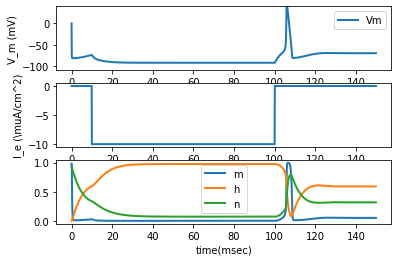

In [ ]:

# run the simulation
hh_hyper()


## Question 4.2:

In a few sentences provide a rationale for why this is happening. Construct your argument in terms of the gating variables m, h and n. 

.

Hint: It will be helpful to consider the time scales involved in the inactivation of the gating variables (problem 3). 

Answer: Removing the current from the cell for a long period of time results in the gating variables m and n to approach 0 and h to approach 1. After the current is introduced back into the cell, m and n both rapidly increase/spike causing depolarization where sodium current into the cell increases.


## Question 4.3:

3.	In a few sentences discuss whether (and why or why not) a leaky integrate and fire neuron can exhibit this behavior.



Answer:

A leaky integrate and fire neuron can exhibit this behavior because for there to be a spike, the voltage threshhold must be surpassed by Vinfinity. The equilibrium potential of the system will be equal to Vinfinity when the current goes to zero. That value is less than that of the voltage threshold so a spike will not occur.


